# 5.2 분산분석

5.2.1 이 절의 예제

5.2.2 분산분석이 필요한 시기

- **분산분석**은 평균값의 차이를 검정하는 방법입니다. ... 분산분석을 사용해야 할 때는 세 개 이상의 수준 간의 평균값에 차이가 있는지 검정할 때입니다.

- 독립변수와 종속변수

5.2.3 검정의 다중성 (문제)

- 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제를 **검정의 다중성**이라고 부릅니다. ... 검정을 2회 연속으로 했다고 합시다. ... 그러면 제1종 오류를 저지를 확률은 1 - (0.95 x 0.95) = 0.0975가 되어 거의 10%가 됩니다.

5.2.4 분산분석의 직감적 사고방식 

$$F비 = {{효과의 분산 크기} \over {오차의 분산 크기}}$$

5.2.5 유의미한 차이가 있을 때와 없을 때의 바이올린플롯

![](violin_plot.png)

5.2.6 분산분석의 직감적 사고방식: 오차 및 효과의 분리

5.2.7 군간변동과 군내변동

- 효과의 크기를 **군간변동**이라고 부릅니다.

- 오차의 크기를 **군내변동**이라고 부릅니다.

5.2.8 분석 준비

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

5.2.9 데이터 작성과 표시

In [2]:
weather = ["cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny"]
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({"beer": beer, "weather": weather})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

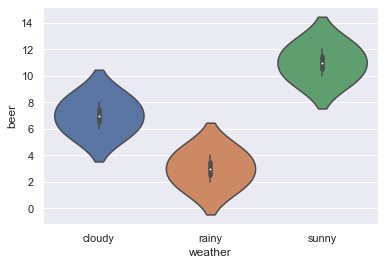

In [3]:
# sns.violinplot(x="weather", y="beer", data=weather_beer)

<AxesSubplot:xlabel='weather', ylabel='beer'>

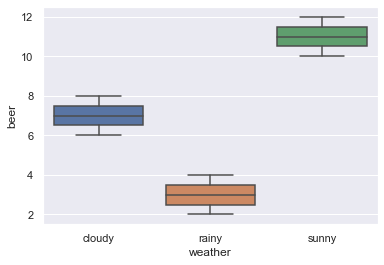

In [4]:
sns.boxplot(x="weather", y="beer", data=weather_beer)

In [5]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


5.2.10 분산분석(1): 군간 제곱과 군내 제곱 계산

In [6]:
# 날씨에 의한 영향
effect = [7, 7, 3, 3, 11, 11]

# 군간 제곱합
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect) ** 2)
print(f"군간 제곱합: {squares_model}")

군간 제곱합: 64.0


In [7]:
resid = weather_beer.beer - effect
print(resid)
print()

# 군내 제곱합
squares_resid = np.sum(resid ** 2)
print(f"군내 제곱합: {squares_resid}")

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

군내 제곱합: 6


5.2.11 분산분석(2): 군간 분산과 군내 분산 계산

In [8]:
df_model = 2
df_resid = 3

# 군간 평균제곱(분산)
variance_model = squares_model / df_model
print(f"군간 평균제곱(분산): {variance_model}")

# 군내 평균제곱(분산)
variance_resid = squares_resid / df_resid
print(f"군내 평균제곱(분산): {variance_resid}")

군간 평균제곱(분산): 32.0
군내 평균제곱(분산): 2.0


5.2.12 분산분석(3): *p*값 계산

In [9]:
f_ratio = variance_model / variance_resid
print(f"F비: {f_ratio}")

p_value = 1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)
print(f"p-value: {p_value}")

F비: 16.0
p-value: 0.02509457330439091


참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)